In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression,PassiveAggressiveClassifier
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
from sklearn.metrics import accuracy_score
import sklearn.svm as SVC
from sklearn.naive_bayes import MultinomialNB,GaussianNB,BernoulliNB
from sklearn.metrics import classification_report,accuracy_score,precision_score,recall_score,f1_score,confusion_matrix

In [ ]:
!pip install nltk
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
from wordcloud import WordCloud

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
!pip install chardet
import chardet
with open('fake_news.csv', 'rb') as f:
    encoding = chardet.detect(f.read())['encoding']  # or readline if the file is large
df=pd.read_csv('fake_news.csv',encoding=encoding)

In [ ]:
df.head()

,unit_id,article_title,article_content,source,location,labels
0,1914947530,Syria attack symptoms consistent with nerve ag...,Wed 05 Apr 2017 Syria attack symptoms consiste...,nna,idlib,0
1,1914947532,Homs governor says U.S. attack caused deaths b...,Fri 07 Apr 2017 at 0914 Homs governor says U.S...,nna,homs,0
2,1914947533,Death toll from Aleppo bomb attack at least 112,Sun 16 Apr 2017 Death toll from Aleppo bomb at...,nna,aleppo,0
3,1914947534,Aleppo bomb blast kills six Syrian state TV,Wed 19 Apr 2017 Aleppo bomb blast kills six Sy...,nna,aleppo,0
4,1914947535,29 Syria Rebels Dead in Fighting for Key Alepp...,Sun 10 Jul 2016 29 Syria Rebels Dead in Fighti...,nna,aleppo,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 804 entries, 0 to 803
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   unit_id          804 non-null    int64 
 1   article_title    804 non-null    object
 2   article_content  804 non-null    object
 3   source           804 non-null    object
 4   location         804 non-null    object
 5   labels           804 non-null    int64 
dtypes: int64(2), object(4)
memory usage: 37.8+ KB


In [ ]:
df.drop(['unit_id'],axis=1,inplace=True)

In [ ]:
df.head()

,article_title,article_content,source,location,labels
0,Syria attack symptoms consistent with nerve ag...,Wed 05 Apr 2017 Syria attack symptoms consiste...,nna,idlib,0
1,Homs governor says U.S. attack caused deaths b...,Fri 07 Apr 2017 at 0914 Homs governor says U.S...,nna,homs,0
2,Death toll from Aleppo bomb attack at least 112,Sun 16 Apr 2017 Death toll from Aleppo bomb at...,nna,aleppo,0
3,Aleppo bomb blast kills six Syrian state TV,Wed 19 Apr 2017 Aleppo bomb blast kills six Sy...,nna,aleppo,0
4,29 Syria Rebels Dead in Fighting for Key Alepp...,Sun 10 Jul 2016 29 Syria Rebels Dead in Fighti...,nna,aleppo,0


In [ ]:
df['text']=df['article_title']+' '+df['article_content']

In [ ]:
df.head()

,article_title,article_content,source,location,labels,text
0,Syria attack symptoms consistent with nerve ag...,Wed 05 Apr 2017 Syria attack symptoms consiste...,nna,idlib,0,Syria attack symptoms consistent with nerve ag...
1,Homs governor says U.S. attack caused deaths b...,Fri 07 Apr 2017 at 0914 Homs governor says U.S...,nna,homs,0,Homs governor says U.S. attack caused deaths b...
2,Death toll from Aleppo bomb attack at least 112,Sun 16 Apr 2017 Death toll from Aleppo bomb at...,nna,aleppo,0,Death toll from Aleppo bomb attack at least 11...
3,Aleppo bomb blast kills six Syrian state TV,Wed 19 Apr 2017 Aleppo bomb blast kills six Sy...,nna,aleppo,0,Aleppo bomb blast kills six Syrian state TV We...
4,29 Syria Rebels Dead in Fighting for Key Alepp...,Sun 10 Jul 2016 29 Syria Rebels Dead in Fighti...,nna,aleppo,0,29 Syria Rebels Dead in Fighting for Key Alepp...


In [ ]:
df.drop(columns=['article_title','article_content'],inplace=True)
df.head()

,source,location,labels,text
0,nna,idlib,0,Syria attack symptoms consistent with nerve ag...
1,nna,homs,0,Homs governor says U.S. attack caused deaths b...
2,nna,aleppo,0,Death toll from Aleppo bomb attack at least 11...
3,nna,aleppo,0,Aleppo bomb blast kills six Syrian state TV We...
4,nna,aleppo,0,29 Syria Rebels Dead in Fighting for Key Alepp...


In [ ]:
df['source'].value_counts()


source
ahram            149
manar            105
alalam            90
alaraby           84
dailysabah        74
sana              56
sputnik           53
etilaf            46
trt               42
jordantimes       28
reuters           26
arabiya           22
nna               13
asharqalawsat     11
tass               5
Name: count, dtype: int64

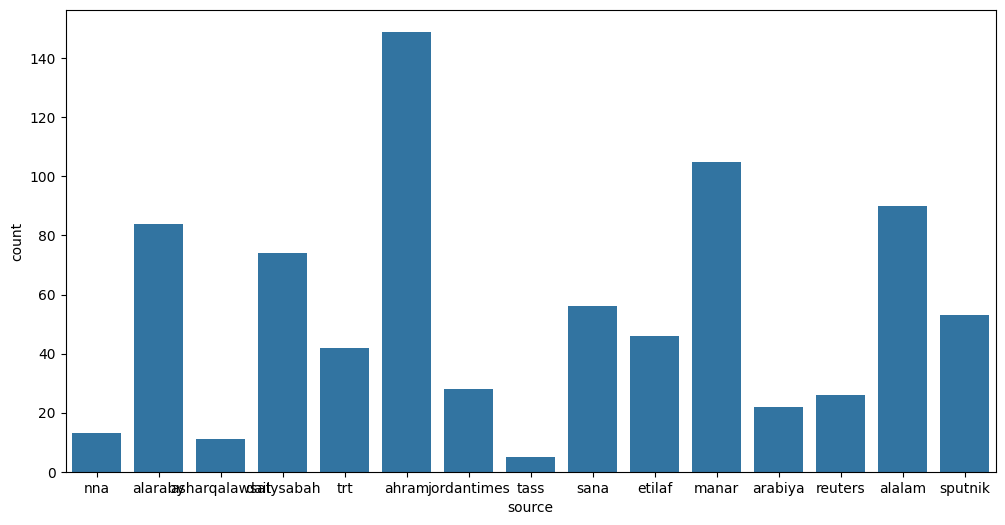

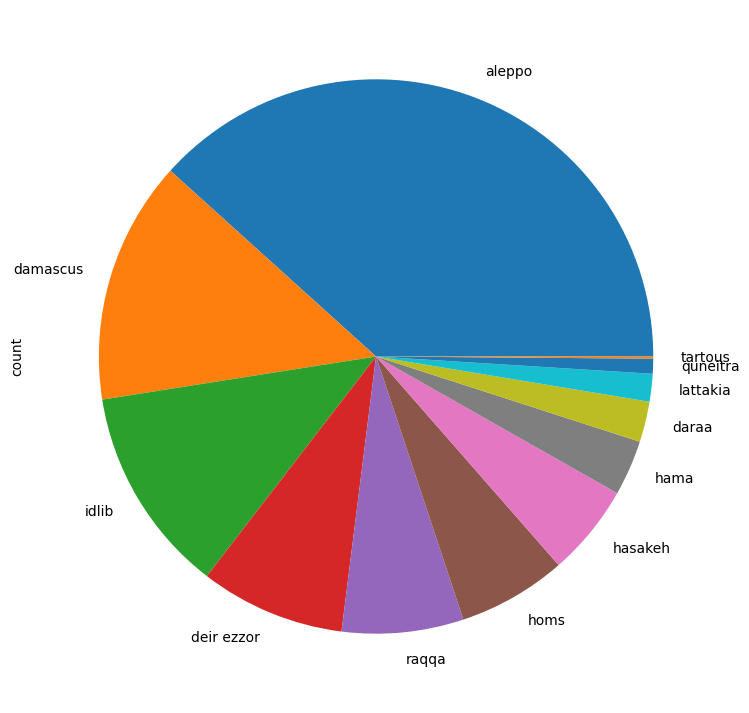

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(x='source',data=df)
plt.show()
plt.figure(figsize=(10,9))
df['location'].value_counts().plot(kind='pie')
plt.show()

In [ ]:
df.drop(['source','location'],axis=1,inplace=True)

In [ ]:
df.head()

,labels,text
0,0,Syria attack symptoms consistent with nerve ag...
1,0,Homs governor says U.S. attack caused deaths b...
2,0,Death toll from Aleppo bomb attack at least 11...
3,0,Aleppo bomb blast kills six Syrian state TV We...
4,0,29 Syria Rebels Dead in Fighting for Key Alepp...


In [ ]:
df['labels'].value_counts()

labels
1    426
0    378
Name: count, dtype: int64

In [ ]:
stop_word= set(stopwords.words('english'))

In [ ]:
stop_word

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [ ]:
import string

In [ ]:
def preprocess_text(news):
  stemer = PorterStemmer()
  news = news.lower()
  news = word_tokenize(news)
  news = [i for i in news if i.isalpha()]
  news =[i for i in news if i not in stop_word]
  news=[i for i in news if i not in string.punctuation]
  news = [stemer.stem(word) for word in news]
  return ' '.join(news)


In [ ]:
df['clean_text']=df['text'].apply(preprocess_text)
df.head()

,labels,text,clean_text
0,0,Syria attack symptoms consistent with nerve ag...,syria attack symptom consist nerv agent use we...
1,0,Homs governor says U.S. attack caused deaths b...,hom governor say attack caus death doesnt see ...
2,0,Death toll from Aleppo bomb attack at least 11...,death toll aleppo bomb attack least sun apr de...
3,0,Aleppo bomb blast kills six Syrian state TV We...,aleppo bomb blast kill six syrian state tv wed...
4,0,29 Syria Rebels Dead in Fighting for Key Alepp...,syria rebel dead fight key aleppo road sun jul...


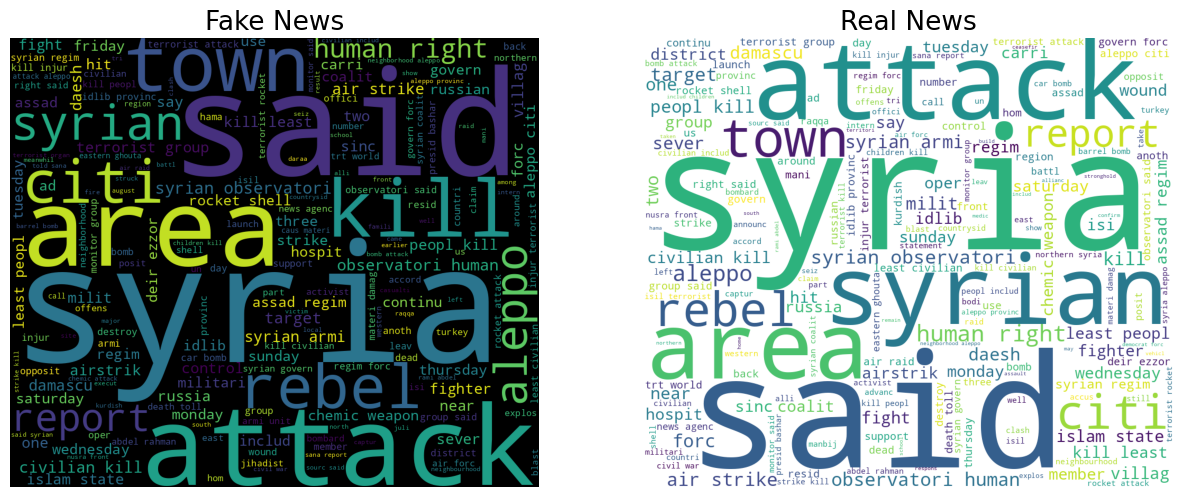

In [ ]:
plt.figure(figsize=(15,10))
plt.subplot(1,2,1)
fake = ' '.join(list(df[df['labels']==0]['clean_text']))
wordcloud_f = WordCloud(width =1000, height = 850,background_color='black').generate(fake)
plt.imshow(wordcloud_f)
plt.title('Fake News',fontdict=dict(fontsize=19))
plt.axis('off')

plt.subplot(1,2,2)
real = ' '.join(list(df[df['labels']==1]['clean_text']))
wordcloud_r = WordCloud(height=850,width=1000,background_color='white').generate(real)
plt.imshow(wordcloud_r)
plt.title('Real News',fontdict=dict(fontsize=19))
plt.axis('off')
plt.show()

In [ ]:
X= df['clean_text']
y=df['labels'].values

In [ ]:
vec = CountVectorizer(max_features=1000,ngram_range=(1,3))
x_transform = vec.fit_transform(X).toarray()

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(x_transform,y,test_size=0.1,random_state=42)

In [ ]:
from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB
from sklearn.linear_model import LogisticRegression, PassiveAggressiveClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier, AdaBoostClassifier, VotingClassifier, BaggingClassifier
from xgboost import XGBClassifier

mb = MultinomialNB()
gn = GaussianNB()
bn = BernoulliNB()
lr = LogisticRegression()
pac = PassiveAggressiveClassifier(max_iter=50)
svc = SVC(kernel='linear')
rfc = RandomForestClassifier()
gbc = GradientBoostingClassifier()
etc = ExtraTreesClassifier()
ada = AdaBoostClassifier()
vt = VotingClassifier(estimators=[('lr', lr), ('rfc', rfc), ('gbc', gbc)])  # Example estimators, adjust as needed
bag = BaggingClassifier()
xg = XGBClassifier()
nb=MultinomialNB()
gnb=GaussianNB()

In [ ]:
models={
    'MultinomialNB':mb,
    'GaussianNB':gn,
    'BernoulliNB':bn,
    'LogisticRegression':lr,
    'PassiveAggressiveClassifier':pac,
    'SVC':svc,
    'RandomForestClassifier':rfc,
    'ExtraTreesClassifier':etc,
    'GradientBoostingClassifier':gbc,
    'AdaBoostClassifier':ada,
    'BaggingClassifier':bag,
    'XGBClassifier':xg,
    'MultinomialNB':nb
}
m = ['mb','gb','bnb','lr','pac','svc','rfc','etc','gbc','ada','bag','xg','nb']

In [ ]:
k=0
model_df=pd.DataFrame()
for i,j in models.items():
  j.fit(X_train,y_train)
  y_pred= j.predict(X_test)
  df = pd.DataFrame({
      'accurcy_score':[round((accuracy_score(y_test,y_pred)),3)],
      'precision_score':[round((precision_score(y_test,y_pred)),3)],
      'recall_score':[round((recall_score(y_test,y_pred)),3)],
      'f1_score':[round((f1_score(y_test,y_pred)),3)],
      'model_name':[i],
      'short':[m[k]]
  },index=[k])
  k+=1
  model_df = pd.concat([df,model_df],axis=0)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


In [ ]:
df = model_df.copy()

In [ ]:
def highlight(s):
  max = s==s.max()
  return ['background-color: yellow' if i else "" for i in max]
model_df.style.apply(highlight,subset=['accurcy_score','precision_score','recall_score','f1_score'])

,accurcy_score,precision_score,recall_score,f1_score,model_name,short
11,0.481000,0.604000,0.558000,0.580000,XGBClassifier,xg
10,0.519000,0.667000,0.500000,0.571000,BaggingClassifier,bag
9,0.494000,0.622000,0.538000,0.577000,AdaBoostClassifier,ada
8,0.457000,0.580000,0.558000,0.569000,GradientBoostingClassifier,gbc
7,0.494000,0.612000,0.577000,0.594000,ExtraTreesClassifier,etc
6,0.543000,0.653000,0.615000,0.634000,RandomForestClassifier,rfc
5,0.556000,0.667000,0.615000,0.640000,SVC,svc
4,0.556000,0.667000,0.615000,0.640000,PassiveAggressiveClassifier,pac
3,0.506000,0.636000,0.538000,0.583000,LogisticRegression,lr
2,0.469000,0.615000,0.462000,0.527000,BernoulliNB,bnb


In [ ]:
nb=MultinomialNB()
nb.fit(X_train,y_train)
c=nb.predict(X_test)
print(classification_report(y_test,c))

              precision    recall  f1-score   support

           0       0.47      0.48      0.47        29
           1       0.71      0.69      0.70        52

    accuracy                           0.62        81
   macro avg       0.59      0.59      0.59        81
weighted avg       0.62      0.62      0.62        81



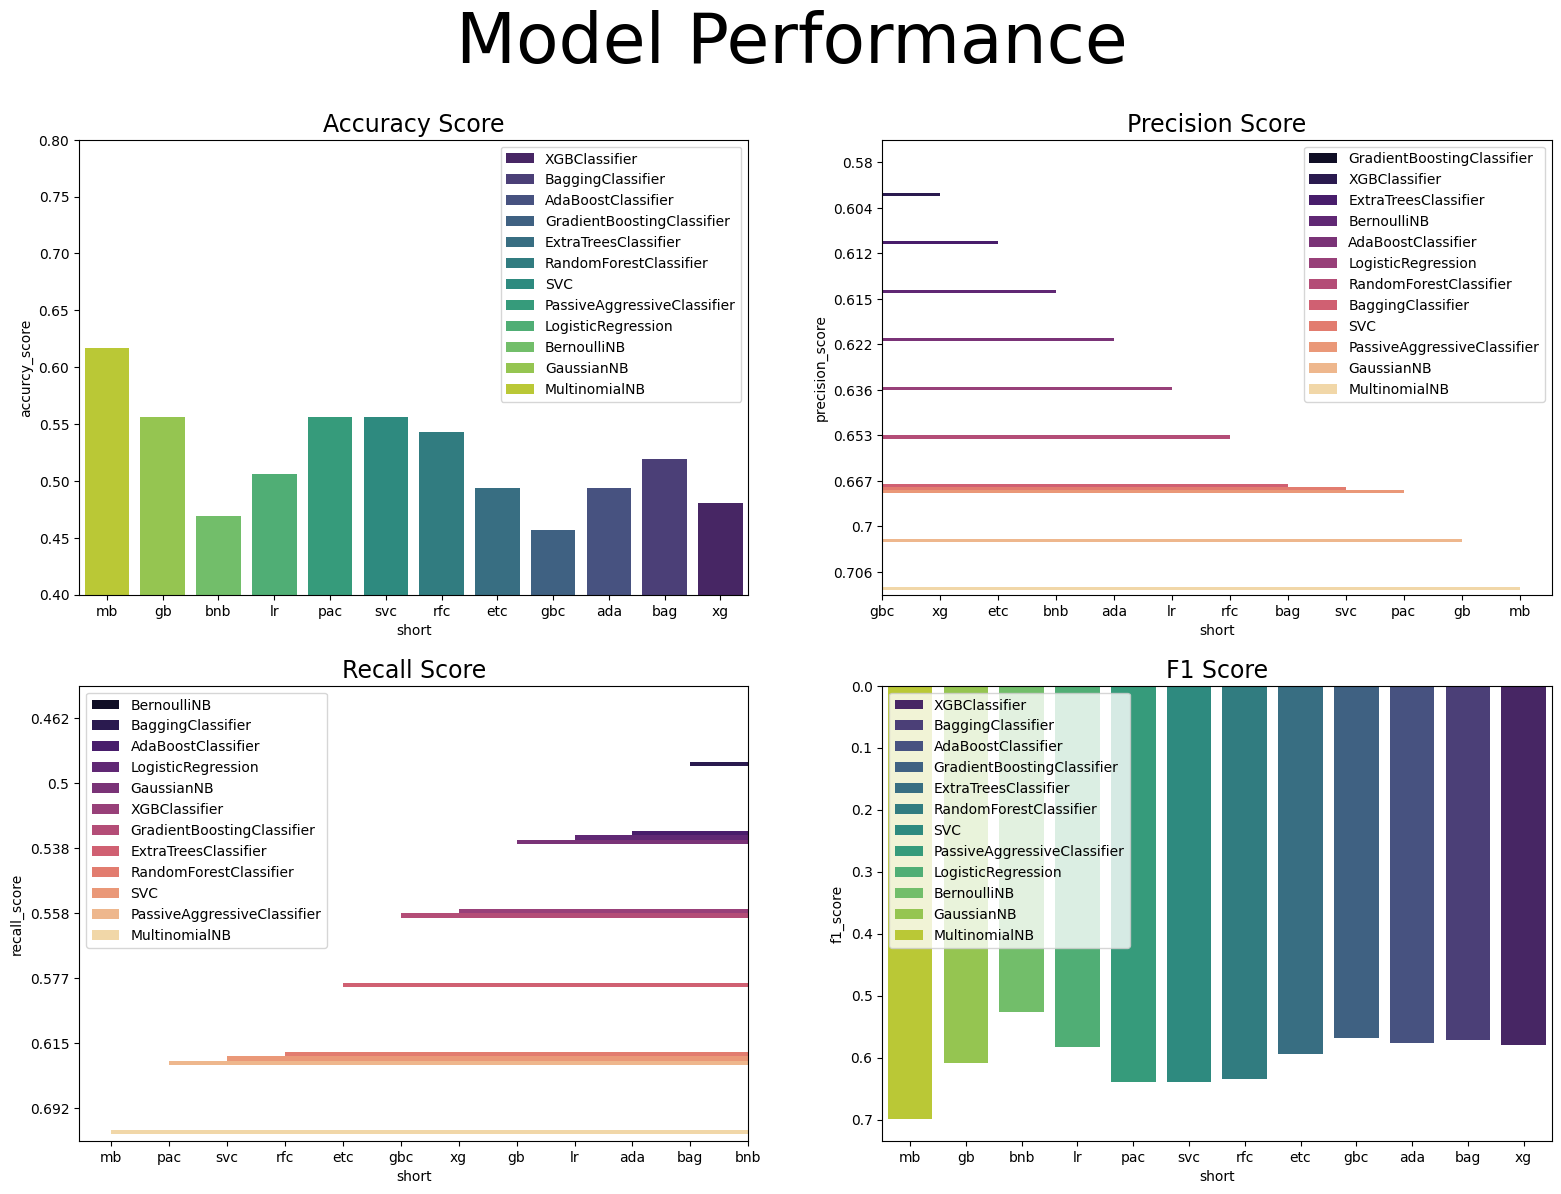

In [ ]:
plt.figure(figsize=(19,13))
plt.suptitle('Model Performance',fontsize=50)
plt.subplot(2,2,1)
sns.barplot(y='accurcy_score',x='short',data=df,palette='viridis',orient='v',hue='model_name')
plt.title('Accuracy Score',fontdict=dict(fontsize=17))
plt.legend(loc='upper right')
plt.gca().invert_xaxis()
plt.gca().set_ylim(0.4,0.8)

plt.subplot(2,2,2)
sns.barplot(y='precision_score',x='short',data=df,palette='magma',orient='y',hue='model_name')
plt.title('Precision Score',fontdict=dict(fontsize=17))
plt.legend(loc='upper right')

plt.subplot(2,2,3)
sns.barplot(y='recall_score',x='short',data=df,palette='magma',orient='h',hue='model_name')
plt.title('Recall Score',fontdict=dict(fontsize=17))
plt.legend(loc='upper left')
plt.gca().invert_xaxis()

plt.subplot(2,2,4)
sns.barplot(y='f1_score',x='short',data=df,palette='viridis',orient='v',hue='model_name')
plt.title('F1 Score',fontdict=dict(fontsize=17))
plt.legend(loc='upper left')
plt.gca().invert_xaxis()
plt.gca().invert_yaxis()
plt.show()